In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Number of timesteps to reach fixed point: 19


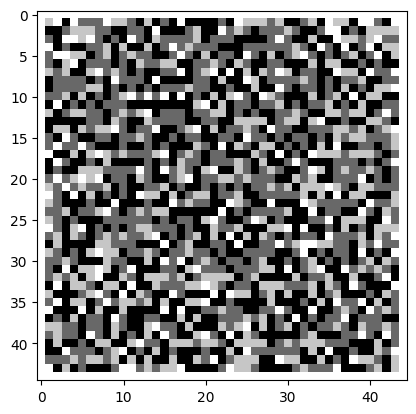

In [3]:
import cellpylib as cpl
import numpy as np


n_rows = 45
n_cols = 45
sandpile = cpl.Sandpile(n_rows, n_cols)
sandpile.add_grain(cell_index=(23, 23), timestep=1)

initial = np.loadtxt('sandpile_add_grain_demo.txt', dtype=int)
initial = np.array([initial])

ca = cpl.evolve2d(initial, timesteps=cpl.until_fixed_point(),
                  apply_rule=sandpile, neighbourhood="von Neumann")

print("Number of timesteps to reach fixed point: %s" % len(ca))
cpl.plot2d_animate(ca)


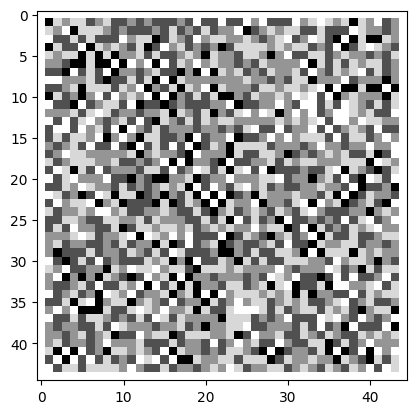

In [4]:
import cellpylib as cpl
import numpy as np


n_rows = 45
n_cols = 45
sandpile = cpl.Sandpile(n_rows, n_cols)

initial = np.random.randint(5, size=n_rows*n_cols).reshape((1, n_rows, n_cols))
# we're using a closed boundary, so make the boundary cells 0
initial[0, 0, :], initial[0, n_rows-1, :], initial[0, :, 0], initial[0, :, n_cols-1] = 0, 0, 0, 0

ca = cpl.evolve2d(initial, timesteps=50, apply_rule=sandpile, neighbourhood="von Neumann")

cpl.plot2d_animate(ca)


Number of timesteps to reach fixed point: 51


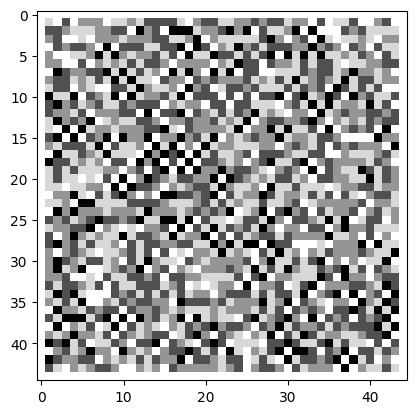

In [5]:
import cellpylib as cpl
import numpy as np
np.random.seed(0)


n_rows = 45
n_cols = 45
sandpile = cpl.Sandpile(n_rows, n_cols)

initial = np.random.randint(5, size=n_rows*n_cols).reshape((1, n_rows, n_cols))
# we're using a closed boundary, so make the boundary cells 0
initial[0, 0, :], initial[0, n_rows-1, :], initial[0, :, 0], initial[0, :, n_cols-1] = 0, 0, 0, 0

ca = cpl.evolve2d(initial, timesteps=cpl.until_fixed_point(),
                  apply_rule=sandpile, neighbourhood="von Neumann")

print("Number of timesteps to reach fixed point: %s" % len(ca))
cpl.plot2d_animate(ca)


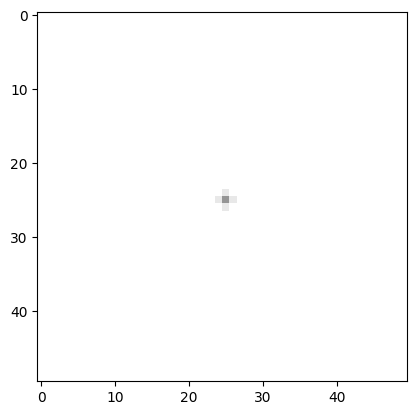

In [6]:
import cellpylib as cpl

"""
We repeatedly drop a grain of sand in the middle, allowing the sandpile to grow. 
After a grain is dropped, the system is allowed to evolve until a fixed point, 
where no further change occurs, before the next grain is dropped.
"""
n = 50
sandpile = cpl.Sandpile(n, n)
ca = cpl.init_simple2d(n, n, val=5)

for i in range(300):
    ca[-1, n//2, n//2] += 1
    ca = cpl.evolve2d(ca, apply_rule=sandpile,
                      timesteps=cpl.until_fixed_point(), neighbourhood='Moore')

cpl.plot2d_animate(ca)
